# Базовые понятия статистики

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
# переведем в килограммы и сантиметры:
df['Height'] = df['Height'] * 2.54
df['Weight'] = df['Weight'] * 0.45

df.head()

,Gender,Height,Weight
0,Male,187.571423,108.852103
1,Male,174.706036,73.039713
2,Male,188.239668,95.733385
3,Male,182.196685,99.019112
4,Male,177.499761,92.857410


## Минимум, максимум и размах

In [4]:
print(max(df['Height']))
print(np.max(df['Height']))
print(df['Height'].max())

200.6568055598296
200.6568055598296
200.6568055598296


In [5]:
print(min(df['Height']))
print(np.min(df['Height']))
print(df['Height'].min())

137.82835864574665
137.82835864574665
137.82835864574665


In [6]:
df[df['Weight'] == df['Weight'].min()]

,Gender,Height,Weight
9285,Female,137.828359,29.115057


In [7]:
weight_range = df['Weight'].max() - df['Weight'].min()
height_randg = df['Height'].max() - df['Height'].min()
print(weight_range)
print(height_randg)

92.38030730655885
62.828446914082946


## Среднее арифметическое

In [8]:
print(np.mean(df['Weight']))
print(df['Weight'].mean())

72.64816057477385
72.64816057477385


## Мода

In [9]:
print(df['Gender'].mode())

0    Female
1      Male
Name: Gender, dtype: object


In [10]:
df.groupby('Gender').count()

,Height,Weight
Gender,,
Female,5000,5000
Male,5000,5000


## Медиана

In [11]:
print(df['Height'].median())
print(np.median(df['Height']))

168.447898007733
168.447898007733


## Стандартное отклонение

In [12]:
print(df['Height'].std())
print(np.std(df['Height'], ddof=1))

9.772721426763994
9.772721426763994


## Дисперсия

In [13]:
print(df['Height'].var())
print(np.var(df['Height'], ddof=1))

95.50608408513206
95.50608408513206


## Квантили

In [14]:
# медиана:
df['Height'].quantile()

168.447898007733

In [15]:
# первый и третий квартили:
df['Height'].quantile([0.25, 0.75])

0.25    161.304276
0.75    175.702625
Name: Height, dtype: float64

In [16]:
# межквартильный размах:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
IQR

14.398348763864021

## Describe

In [17]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,72.648161
std,9.772721,14.448798
min,137.828359,29.115057
25%,161.304276,61.118123
50%,168.447898,72.545817
75%,175.702625,84.226286
max,200.656806,121.495364


## Boxplot

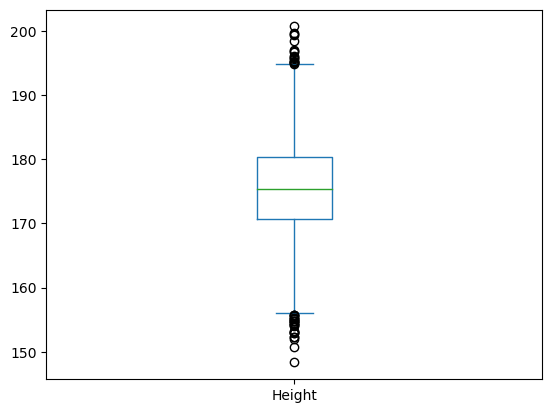

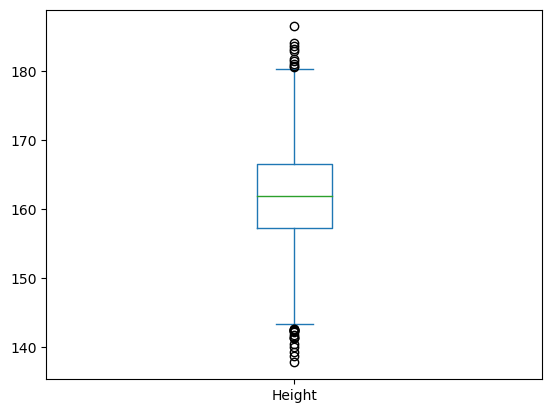

In [18]:
df[df['Gender'] == 'Male']['Height'].plot(kind='box')
plt.show()
df[df['Gender'] == 'Female']['Height'].plot(kind='box')
plt.show()

## Выбросы

In [19]:
# тыкнем пальцем в небо (определим выбросы вручную) и посмотрим, как изменятся средние
print(df['Weight'].mean())
print(df[(df['Weight'] > 50) & (df['Weight'] < 150)]['Weight'].mean())

72.64816057477385
74.04876258391796


In [20]:
print(df['Weight'].median())
print(df[(df['Weight'] > 50) & (df['Weight'] < 150)]['Weight'].median())

72.54581746476734
73.7809355907585


In [21]:
print(df['Weight'].round().mode()[0])
print(df[(df['Weight'] > 50) & (df['Weight'] < 150)]['Weight'].round().mode()[0])

62.0
62.0


А теперь найдем выбросы через межквартильный размах (на примере роста)

In [22]:
q1 = df['Height'].quantile(0.25)
q3 = df['Height'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['Height'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

/tmp/ipykernel_5101/1780310504.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  remove_outliers = df[df['Height'].between(lower_bound, upper_bound, inclusive=True)]


,Gender,Height,Weight
0,Male,187.571423,108.852103
1,Male,174.706036,73.039713
2,Male,188.239668,95.733385
3,Male,182.196685,99.019112
4,Male,177.499761,92.857410
...,...,...,...
9995,Female,168.078536,61.549854
9996,Female,170.350573,76.890558
9997,Female,162.224700,57.813893
9998,Female,175.346978,73.733608


In [23]:
# Посмотрим, какие наблюдения были выброшены:
df[~ df['Height'].between(lower_bound, upper_bound, inclusive=True)]

/tmp/ipykernel_5101/1792079341.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df[~ df['Height'].between(lower_bound, upper_bound, inclusive=True)]


,Gender,Height,Weight
994,Male,198.363503,115.060876
1317,Male,199.293614,102.304154
2014,Male,200.656806,121.495364
3285,Male,199.461654,114.250052
3757,Male,199.698290,110.580202
6624,Female,138.726819,32.127187
7294,Female,139.379268,35.373002
9285,Female,137.828359,29.115057


In [24]:
print(remove_outliers['Height'].mean())
print(remove_outliers['Height'].median())

168.56711463763818
168.44728161329638


In [25]:
# Что больше изминилось? Среднее или Медиана? -> Среднее
print(df['Height'].mean() - remove_outliers['Height'].mean())
print(df['Height'].median() - remove_outliers['Height'].median())

0.0064871396077990084
0.0006163944366051055


## Пропуски

In [26]:
titanic = pd.read_csv('stat_datas/titanic.csv')
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Посчитаем % пропусков по столбцам
(titanic.isna().mean() * 100).round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

### Игнорирование пропусков

In [32]:
print(titanic['Age'].mean())
print(titanic['Age'].median())
print(titanic['Age'].mode()[0])
print(titanic['Age'].std())
print(titanic['Age'].var())

29.69911764705882
28.0
24.0
14.526497332334044
211.0191247463081


In [33]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Удаление строк с пропусками

In [39]:
# Удаляем все строки, имеющие пропуски
titanic.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


**Результат:** Осталось 183 наблюдения из 891

In [38]:
# как изменились основные статистики возраста?
titanic.dropna().Age.describe()

count    183.000000
mean      35.674426
std       15.643866
min        0.920000
25%       24.000000
50%       36.000000
75%       47.500000
max       80.000000
Name: Age, dtype: float64

In [40]:
# оставляем только те строки, в которых как минимум 11 из 12 значений заполнено:
titanic.dropna(thresh=11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Результат:** Осталось 733 набдюдения из 891

#### Удаление столбцов с пропусками

In [41]:
# удалить все столюцы, имеющие пропуски (странное решение)
titanic.dropna(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


**Результат:** Осталось 9 столбцов из 12 (могли быть удалены важные признаки)

In [42]:
# У нас много пропусков в Cabin (решено, что эта информация нам не нужна)
titanic.drop(['Cabin'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Замена пропусков

#### Замена на определенное значение

In [43]:
fill_by_cnst = titanic.copy()
fill_by_cnst['Cabin'] = fill_by_cnst['Cabin'].fillna('no_info')
print(fill_by_cnst['Cabin'].isna().sum())
print(fill_by_cnst['Cabin'].unique())

0
['no_info' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24'
 'C50' 'B42' 'C148']


#### Замена средним

In [47]:
fill_mean = titanic.copy()
fill_mean['Age'] = fill_mean['Age'].fillna(titanic['Age'].mean())

In [48]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [49]:
fill_mean.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

**Результат:** Пожертвовали стандартным отклонением

#### Заменяем медианой

In [50]:
fill_median = titanic.copy()
fill_median['Age'] = fill_median['Age'].fillna(titanic['Age'].median())

In [52]:
fill_median.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### Заменяем модой

In [58]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [61]:
# заменим пропуски в Embarked наиболее часто встречающимся значением S
fill_mode = titanic.copy()
fill_mode['Embarked'] = fill_mode['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [62]:
fill_mode.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### Заполнение пропусков с группировкой по одной переменной

In [63]:
# мы не можем исключать, что медианный возраст мужчин и женщи отличается
print(titanic.groupby('Sex')['Age'].median())

Sex
female    27.0
male      29.0
Name: Age, dtype: float64


In [66]:
fill_median_by_gender = titanic.copy()
fill_median_by_gender['Age'] = fill_median_by_gender['Age'].fillna(titanic.groupby('Sex')['Age'].transform('median'))

In [68]:
# а может быть и в разных классах были пассажиры разного возраста?
print(titanic.groupby(['Sex', 'Pclass'])['Age'].median())

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [70]:
fill_median_by_groups = titanic.copy()
fill_median_by_groups['Age'] = fill_median_by_groups['Age'].fillna(titanic.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

#### Заполнение следующим/предыдущим значением

In [73]:
city_day = pd.read_csv('stat_datas/city_day.csv')
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [74]:
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [76]:
(city_day.isna().mean() * 100).round(2)

City           0.00
Date           0.00
PM2.5         15.57
PM10          37.72
NO            12.13
NO2           12.14
NOx           14.17
NH3           34.97
CO             6.97
SO2           13.05
O3            13.62
Benzene       19.04
Toluene       27.23
Xylene        61.32
AQI           15.85
AQI_Bucket    15.85
dtype: float64

In [77]:
# заполнение пропусков предыдущими значениями
city_day.fillna(method='ffill', inplace=True)

In [79]:
# заполнение пропусков следующими значениями
city_day.fillna(method='bfill', inplace=True)

In [80]:
(city_day.isna().mean() * 100).round(2)

City          0.0
Date          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64